In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_clf = LogisticRegression()
forest_clf = RandomForestClassifier(n_estimators=10, random_state=10)
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', forest_clf), ('svc', svm_clf)],
    voting='hard'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=10)),
                             ('svc', SVC())])

In [2]:
from sklearn.metrics import accuracy_score
for clf in(log_clf, forest_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.85
RandomForestClassifier 0.87
SVC 0.87
VotingClassifier 0.88


In [3]:
log_clf = LogisticRegression()
forest_clf = RandomForestClassifier(n_estimators=10, random_state=10)
# by default the SVC class does not make predictions based on probabilities. Setting the probability
# hyperparameter to True makes the class use cross validation to calculate probailities for classes.
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', forest_clf), ('svc', svm_clf)],
    # Simply change the voting hyperparameter to 'soft'
    voting='soft'
)

for clf in(log_clf, forest_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.85
RandomForestClassifier 0.87
SVC 0.87
VotingClassifier 0.91


In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    # if the base classifier has a predict_probas method, then BaggingClassifier will use soft voting
    # DecisionTreeClassifier has a predict_probas method
    DecisionTreeClassifier(), 
    # n_estimators is the number of models to train
    n_estimators=500, 
    # max_samples is the number of instances to sample from the training set
    max_samples=100,
    # bootstrap=True is for bagging while bootstrap=False is for pasting
    bootstrap=True,
    # n_jobs=-1 distributes the computation over multiple cores
    n_jobs=-1)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print("Bagging classifier", accuracy_score(y_pred, y_test))

Bagging classifier 0.89


In [5]:
# create a mesh to cover the data space
mesh_x1, mesh_x2 = np.meshgrid(np.arange(X[:, 0].min() - 0.2, X[:, 0].max() + 0.2, 0.01),
                              np.arange(X[:, 1].min() - 0.2, X[:, 1].max() + 0.2, 0.01))

titles = (
    "Single Decision Tree",
    "Bagging ensemble of 500 trees"
)
tree_clf = DecisionTreeClassifier()
models = (clf.fit(X_train, y_train) for clf in (tree_clf, bag_clf))

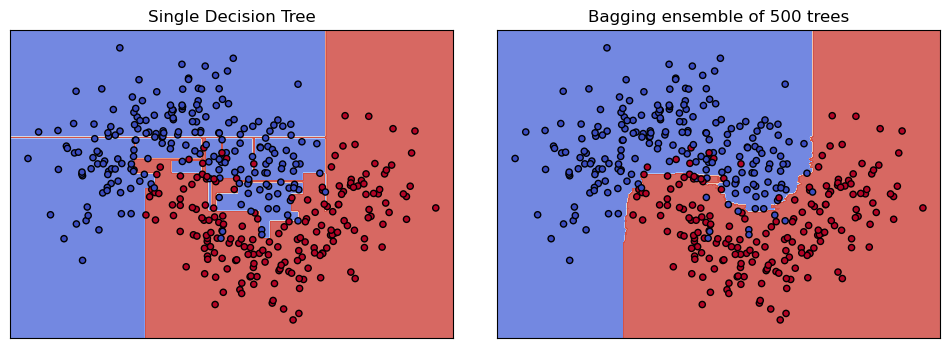

In [6]:
fig, sub = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    mesh_predict = clf.predict(np.c_[mesh_x1.ravel(), mesh_x2.ravel()]).reshape(mesh_x1.shape)
    ax.contourf(mesh_x1, mesh_x2, mesh_predict, cmap=plt.cm.coolwarm, alpha=0.8)
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(mesh_x1.min(), mesh_x1.max())
    ax.set_ylim(mesh_x2.min(), mesh_x2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),  n_estimators=500, max_samples=100,bootstrap=True, n_jobs=-1, 
    oob_score=True)

bag_clf.fit(X_train, y_train)
print(bag_clf.oob_score_)

0.92


In [7]:
from sklearn.ensemble import RandomForestClassifier

# RandonForestClassifier has the same hyperparameters as DecisionTreeClf and BaggingClf
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_train)

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)

rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score*100, "%")

sepal length (cm) 9.402875639177816 %
sepal width (cm) 2.1730213064693347 %
petal length (cm) 44.09252516652 %
petal width (cm) 44.33157788783287 %


In [9]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    # A *Decision Stump* is a decision tree of max_depth=1, ie a single node with two leaf nodes
    # A decision stump is the default estimator for AdaBoostClf
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5
)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

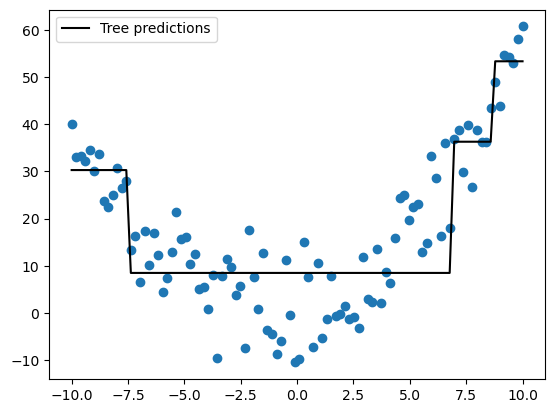

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)

X = np.linspace(-10, 10, 100)
y = 0.5*X**2 + X + 6*np.random.randn(100)

tree_reg1.fit(X.reshape(-1, 1), y)

y_predict = tree_reg1.predict(X.reshape(-1, 1))

plt.scatter(X, y)
plt.plot(X, y_predict, "k", label="Tree predictions")
plt.legend()
plt.show()

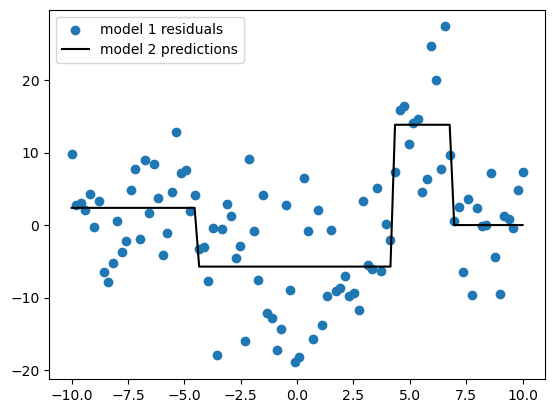

In [11]:
# now calculat the residuals
y2 = y - tree_reg1.predict(X.reshape(-1, 1))

# train a new model on these residuals
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X.reshape(-1, 1), y2)

y_predict2 = tree_reg2.predict(X.reshape(-1, 1))

plt.scatter(X, y2, label="model 1 residuals")
plt.plot(X, y_predict2, "k", label="model 2 predictions")
plt.legend()
plt.show()

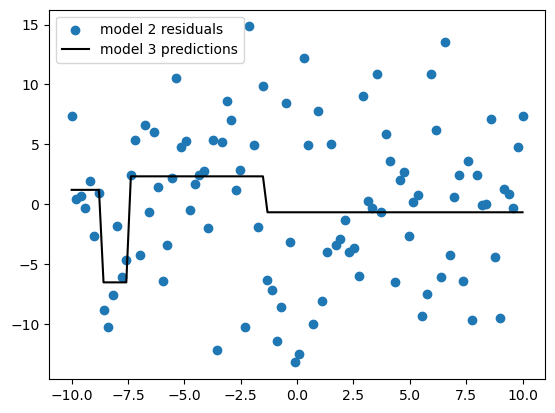

In [12]:
# repeat
y3 = y2 - tree_reg2.predict(X.reshape(-1, 1))

# train a new model on these residuals
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X.reshape(-1, 1), y3)

y_predict3 = tree_reg3.predict(X.reshape(-1, 1))

plt.scatter(X, y3, label="model 2 residuals")
plt.plot(X, y_predict3, "k", label="model 3 predictions")
plt.legend()
plt.show()

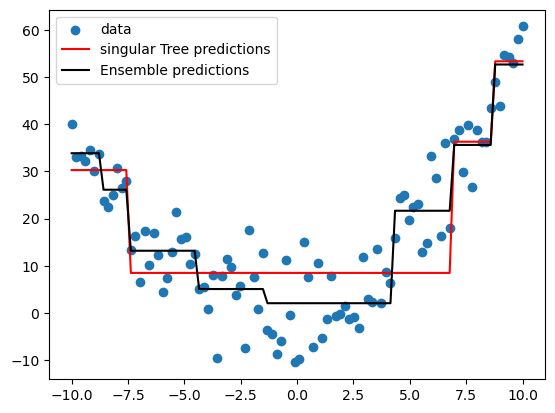

In [13]:
# now sum the three different models

y_pred = sum(tree.predict(X.reshape(-1, 1)) for tree in (tree_reg1, tree_reg2, tree_reg3))
plt.scatter(X, y, label="data")
plt.plot(X, y_predict, "r", label="singular Tree predictions")
plt.plot(X, y_pred, "k", label="Ensemble predictions")
plt.legend()
plt.show()

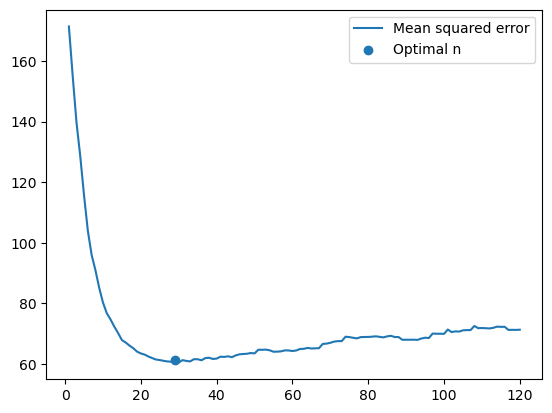

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_val, y_train, y_val = train_test_split(X.reshape(-1, 1), y, random_state=42)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
best_n = np.argmin(errors)

n_list = list(range(1, 121))
plt.plot(n_list, errors, label="Mean squared error")
plt.scatter(best_n, errors[best_n+1], label="Optimal n")
plt.legend()
plt.show()

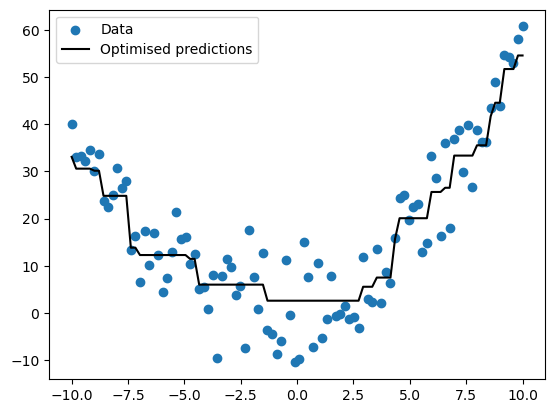

In [15]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n)
gbrt_best.fit(X.reshape(-1, 1), y)

plt.scatter(X, y, label="Data")
plt.plot(X, gbrt_best.predict(X.reshape(-1, 1)), "k", label="Optimised predictions")
plt.legend()
plt.show()